In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('solarpowergeneration.csv')

In [3]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [7]:
df['sky-cover'].value_counts()

sky-cover
1    776
4    598
3    580
0    518
2    448
Name: count, dtype: int64

In [8]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [9]:
df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].mean(), inplace=True)

In [10]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(2920, 10)

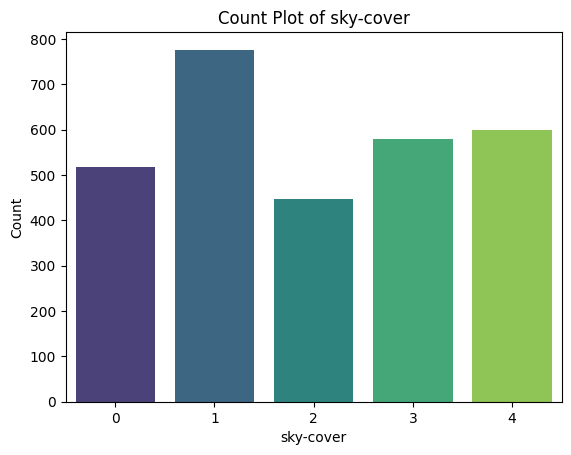

In [13]:
sns.countplot(data=df, x='sky-cover', palette='viridis')
plt.title('Count Plot of sky-cover')
plt.xlabel('sky-cover')
plt.ylabel('Count')
plt.show()

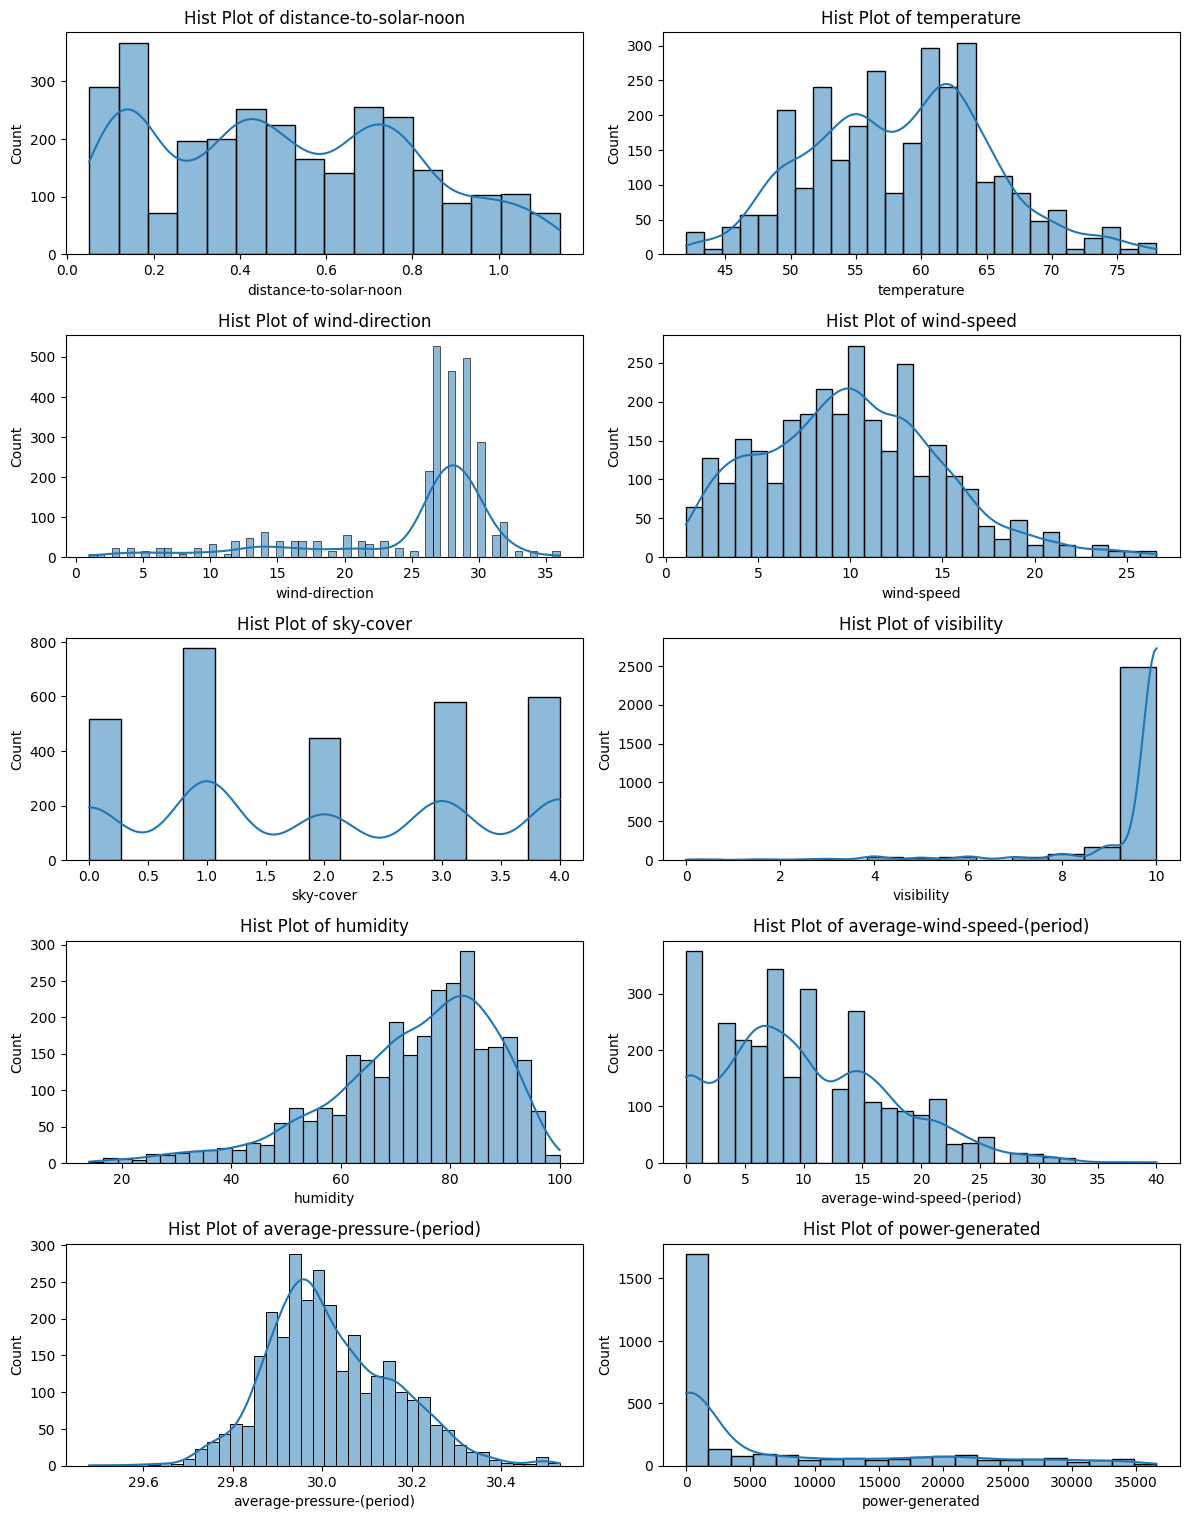

In [14]:
plt.figure(figsize=(12,len(df.columns)*3))
for i,fe in enumerate(df.columns,1):
    plt.subplot(len(df.columns),2,i)
    sns.histplot(data=df, x=fe,kde=True,palette='viridis')  # Define the palette
    plt.title(f'Hist Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

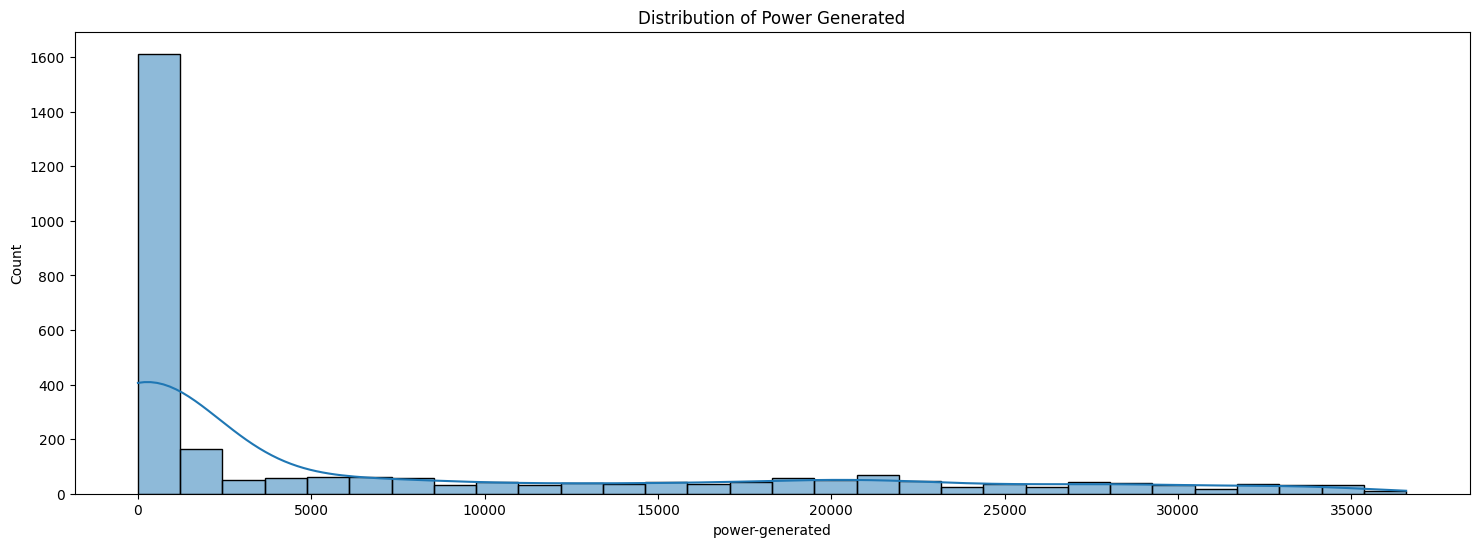

In [15]:
# Visualizing target variable distribution
plt.figure(figsize=(18,6))
sns.histplot(df['power-generated'], bins=30, kde=True)
plt.title("Distribution of Power Generated")
plt.show()

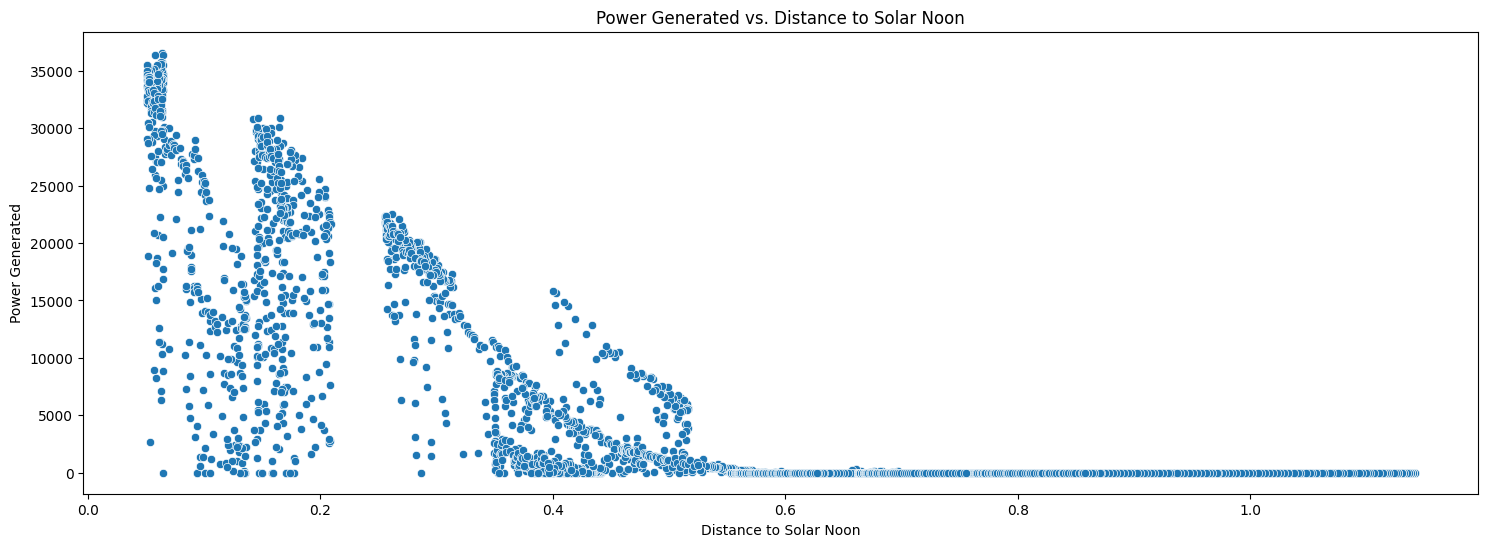

In [16]:
# Scatter plot: Solar noon vs Power Generated
plt.figure(figsize=(18,6))
sns.scatterplot(x=df['distance-to-solar-noon'], y=df['power-generated'])
plt.title("Power Generated vs. Distance to Solar Noon")
plt.xlabel("Distance to Solar Noon")
plt.ylabel("Power Generated")
plt.show()

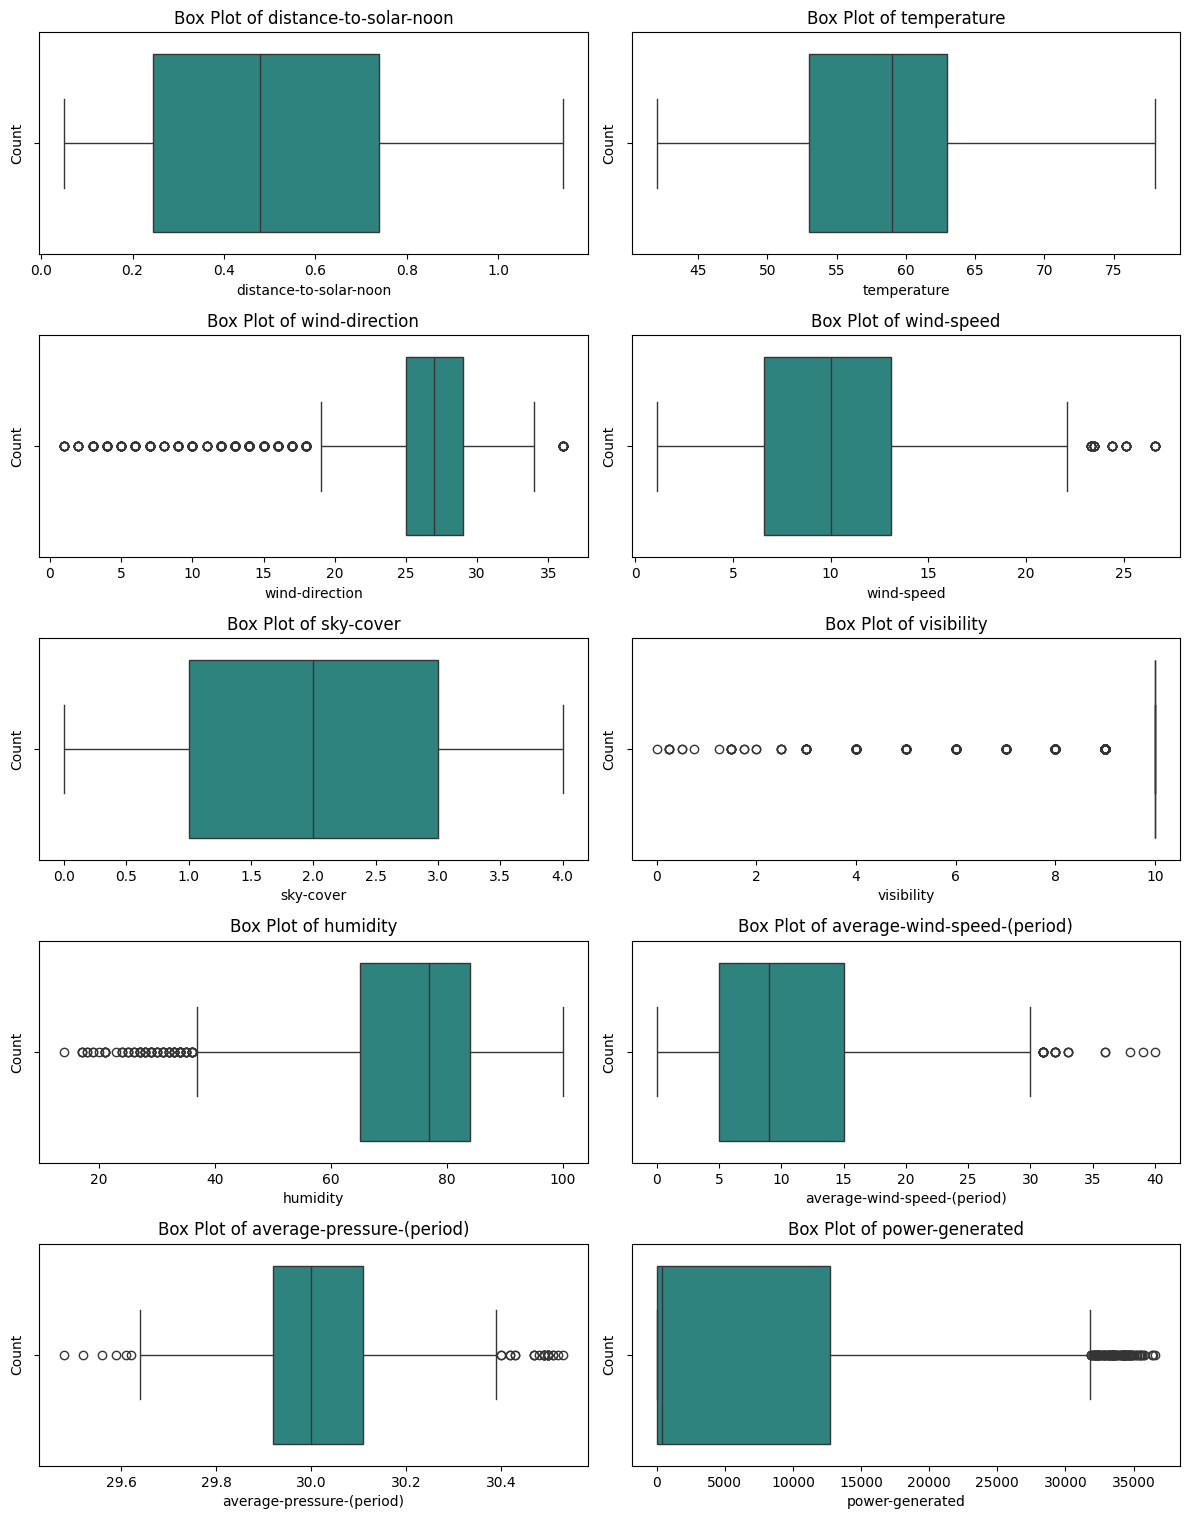

In [17]:
plt.figure(figsize=(12,len(df.columns)*3))
for i,fe in enumerate(df.columns,1):
    plt.subplot(len(df.columns),2,i)
    sns.boxplot(data=df, x=fe,palette='viridis')  # Define the palette
    plt.title(f'Box Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardizing numerical features
scaler = StandardScaler()
numeric_cols = df.drop(columns=['power-generated']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [19]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,1.196765,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.098597,-0.293310,-1.392859,0
1,0.420310,1.539688,0.440639,-0.536861,-1.407962,0.319659,0.231271,-0.706587,-1.181564,0
2,-0.356146,1.539688,0.440639,-0.536861,-1.407962,0.319659,-0.233088,-1.395381,-0.899837,5418
3,-1.132602,1.539688,0.440639,-0.536861,-1.407962,0.319659,-2.687555,-1.395381,-0.758974,25477
4,-1.469066,1.539688,0.440639,-0.536861,-1.407962,0.319659,-3.483598,-0.982104,-0.899837,30069
...,...,...,...,...,...,...,...,...,...,...
2915,-1.130442,0.662498,0.296005,0.786176,1.425428,0.319659,0.098597,-0.017792,-0.618111,6995
2916,-1.474208,0.662498,0.296005,0.786176,-0.699615,0.319659,-0.498436,0.671002,-0.758974,29490
2917,-0.700735,0.662498,0.296005,0.786176,0.008733,0.319659,-0.365762,1.497556,-0.970269,17257
2918,0.072738,0.662498,0.296005,0.786176,0.008733,0.319659,0.496618,0.946520,-1.040701,677


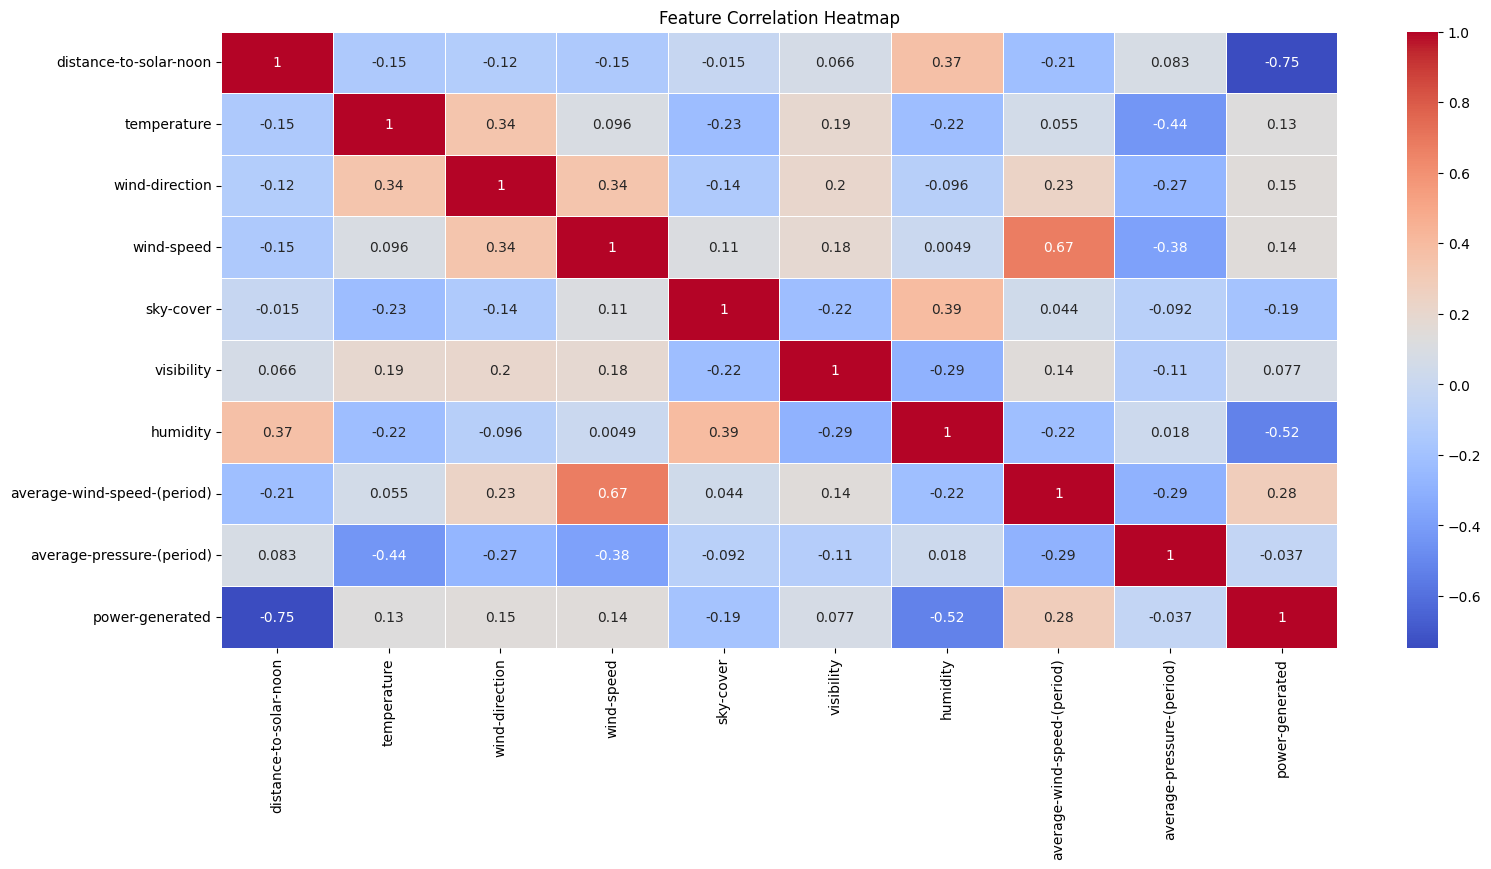

In [20]:
# Correlation Heatmap
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
correlatio = df.corr()
correlatio['power-generated'].sort_values(ascending=False)

power-generated                1.000000
average-wind-speed-(period)    0.278154
wind-direction                 0.146788
wind-speed                     0.142641
temperature                    0.132193
visibility                     0.076536
average-pressure-(period)     -0.036771
sky-cover                     -0.187236
humidity                      -0.522545
distance-to-solar-noon        -0.746681
Name: power-generated, dtype: float64

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
X = df.drop(columns=['power-generated'])  # Drop the target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                       feature       VIF
0       distance-to-solar-noon  1.307211
1                  temperature  1.515693
2               wind-direction  1.304974
3                   wind-speed  2.241170
4                    sky-cover  1.350537
5                   visibility  1.247817
6                     humidity  1.691785
7  average-wind-speed-(period)  2.061378
8    average-pressure-(period)  1.507152


In [23]:
# Save preprocessed data
df.to_csv("preprocessed_dataset.csv", index=False)

print("Preprocessing and visualization completed successfully!")

Preprocessing and visualization completed successfully!
